# Digital Signal Processing

---

A __signal__ represents a quantity that varies in time.

A __periodic signal__ is a signal that repeats itself after some period of time.

A __transducer__ converts a signal from one form to another.

The __period__ is the duration of a cycle.

The __frequency__ is the number of cycles per second.

---

In [79]:
import numpy as np
import numpy.random as npr
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)

from __future__ import division
from collections import Counter, OrderedDict
import itertools as it

import networkx as nx

In [44]:
def walk ():
    '''starting at x=0, step left/right with probability 1/2 until x=1'''
    x = 0
    while x != 1:
        x += npr.choice([-1, 1])
        yield x
        
def walk (limit=50):
    '''limited version of random walker'''
    x = 0
    while x != 1 and abs(x) < limit:
        x += npr.choice([-1, 1])
        yield x
        
def nwalk (limit=500):
    '''limited version of random walker. Only returns length of path, not path itself'''
    n = x = 0
    while x != 1 and n < limit:
        x += npr.choice([-1, 1])
        n += 1
    return n

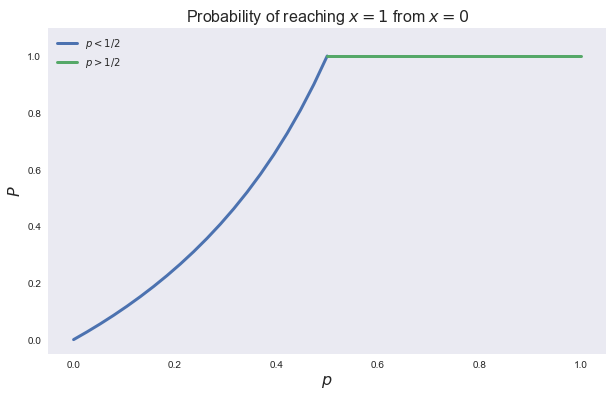

In [7]:
fig, ax = plt.subplots()
p = np.linspace(0, 0.5, 20)
ax.plot(p, p/(1 - p), label=r'$p < 1/2$', lw=3);
ax.plot([0.5, 1], [1, 1], label=r'$p > 1/2$', lw=3);
ax.axis(ymax=1.1);
ax.legend(loc=0);
ax.set_xlabel('$p$', fontsize=16);
ax.set_ylabel('$P$', fontsize=16);
ax.set_title('Probability of reaching $x=1$ from $x=0$', fontsize=16);
ax.grid();

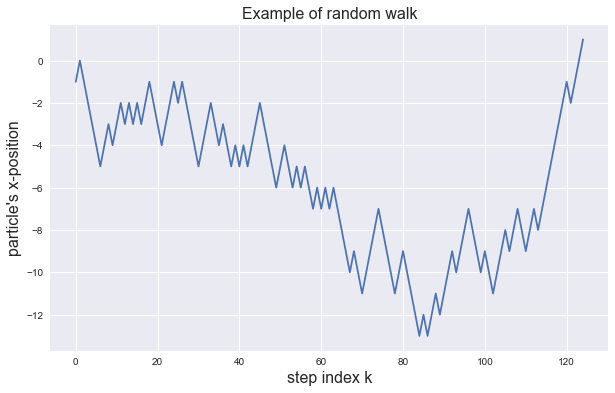

In [41]:
npr.seed(123)

s = list(walk())

fig, ax = plt.subplots();
ax.plot(s);
ax.set_ylabel('particle\'s x-position', fontsize=16);
ax.set_xlabel('step index k', fontsize=16);
ax.set_title('Example of random walk', fontsize=16);

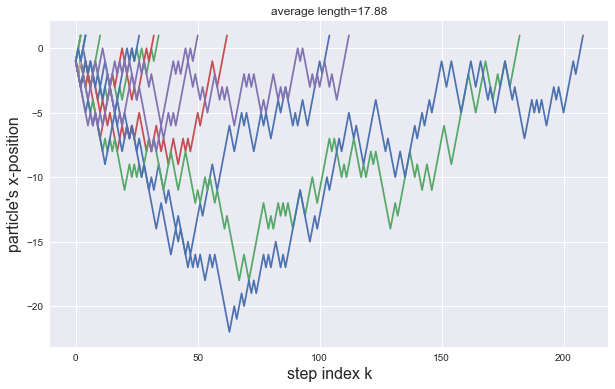

In [42]:
s = [list(walk()) for i in range(50)]
len_walk = map(len, s)

fig, ax = plt.subplots()
for i in s:
    ax.plot(i)
ax.set_ylabel('particle\'s x-position', fontsize=16);
ax.set_xlabel('step index k', fontsize=16);
ax.set_title(f'average length={np.mean(list(len_walk)):0.2f}');

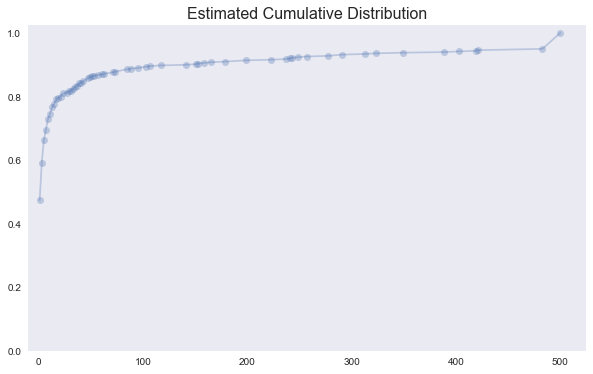

In [72]:
len_walk = [nwalk() for i in range(500)]
lw = pd.Series(Counter(len_walk)) / len(len_walk)
lw = lw.sort_index()

fig, ax = plt.subplots()
ax.plot(lw.index, lw.cumsum(), '-o', alpha=0.3);
ax.axis(xmin=-10, ymin=0);
ax.set_title('Estimated Cumulative Distribution', fontsize=16);
ax.grid();

In [78]:
def estimate_std (limit=10, ncount=50):
    '''quick estimate of the standard deviation of the averages'''
    ws = np.array([[nwalk(limit) for i in range(ncount)] for k in range(ncount)])
    return (limit, ws.mean(), ws.mean(1).std())

for limit in [10, 20, 50, 100, 200, 300, 500, 1000]:
    l, a, s = estimate_std(limit)
    print(f'limit = {l}\taverage = {a:0.2f}\tstd = {s:0.2f}')

limit = 10	average = 4.13	std = 0.48
limit = 20	average = 6.20	std = 0.95
limit = 50	average = 9.92	std = 2.23
limit = 100	average = 15.21	std = 4.66
limit = 200	average = 21.03	std = 6.93
limit = 300	average = 29.09	std = 9.38
limit = 500	average = 38.90	std = 16.73
limit = 1000	average = 46.51	std = 23.07


In [ ]:
class Graph (nx.Graph):
    '''operations assuming `pos` attribute in nodes to support drawing and manipulating path lattice'''
    def draw (self, ax=None, **kwds):
        